### Notebook to play around with CycIF data

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

In [2]:
# Import data
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
#WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
x = pd.read_csv('Trial_data.csv', delimiter=',', index_col=0)
# Look at data
x.head()

,DAPI,CD2,TCR,CD4,DAPI.1,CD3D,CD7,CD43,DAPI.2,ALK,CD45,CD10,DAPI.3,Ki67,CD5,CD11b,DAPI.4,FOXP3,CD8,CD57
C1,2356,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,3396,0,0,0,3656,0,14,4,3195,0,10,0,3983,27,0,76,4140,9,34,0
C3,6740,13,0,0,7914,13,0,7,5810,0,6,0,7060,5,0,0,8117,9,0,0
C4,5002,2,0,0,6041,0,0,0,6421,0,5,0,5410,0,0,0,6553,0,0,0
C5,5457,0,0,0,6905,0,0,0,7927,0,0,0,6053,0,0,0,7058,0,0,0


In [8]:
# Remove all DAPI columns
cols = [c for c in x.columns if c[:4] != 'DAPI']
x1=x[cols]
# Add the first DAPI channel
x1 = pd.concat([x1, x[['DAPI']]], axis=1)

In [9]:
x1.head()

,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,2356
C2,0,0,0,0,14,4,0,10,0,27,0,76,9,34,0,3396
C3,13,0,0,13,0,7,0,6,0,5,0,0,9,0,0,6740
C4,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0,5002
C5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5457


In [11]:
log_data = log_data.replace([np.inf, -np.inf], np.nan).fillna(0)log_data.head()

/Users/aj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,2.060698,1.633468,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,3.372175
C2,-inf,-inf,-inf,-inf,1.146128,0.602060,-inf,1.000000,-inf,1.431364,-inf,1.880814,0.954243,1.531479,-inf,3.530968
C3,1.113943,-inf,-inf,1.113943,-inf,0.845098,-inf,0.778151,-inf,0.698970,-inf,-inf,0.954243,-inf,-inf,3.828660
C4,0.301030,-inf,-inf,-inf,-inf,-inf,-inf,0.698970,-inf,-inf,-inf,-inf,-inf,-inf,-inf,3.699144
C5,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,3.736954


In [4]:
# Normalisation of data
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
x1 = mi_pp_normalize(x1)
x1.head()

Applying log transformation and quantile normalization...


,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57,DAPI
C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Convert to AnnData
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_anndata.py'
exec(open(wget.download(file_url)).read())
adata = mi_pp_anndata (x1)
adata

100% [..................................................................................] 710 / 710Converting dataframe into anndata - Annotated Data...


AnnData object with n_obs × n_vars = 3324 × 16 
    obs: 'cells'

### Scanpy analysis

In [111]:
adata

AnnData object with n_obs × n_vars = 45 × 16 
    obs: 'cells', 'n_genes', 'n_counts'
    var: 'n_cells'

In [110]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)
adata.obs['n_counts'] = adata.X.sum(axis=1)

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int32' is maintained. 


In [115]:
adata.obs['n_genes']

0       2
1       3
16      1
31      1
41      2
63      1
91      2
154     1
174     1
185     1
252     1
271     1
371     3
462     1
549     1
578     1
735     3
843     2
861     1
890     1
1119    2
1249    1
1301    1
1461    1
1773    1
1805    1
1859    1
2020    1
2127    3
2135    1
2214    3
2275    1
2318    1
2335    2
2538    2
2620    2
2665    1
2688    1
2723    1
2742    1
2761    1
2887    1
2935    1
2960    1
3013    2
Name: n_genes, dtype: int32

In [113]:
sc.tl.pca(adata, svd_solver='arpack')

TypeError: object of type 'numpy.int64' has no len()

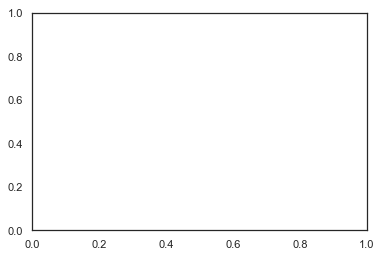

In [114]:
sc.pl.pca(adata,color='DAPI')

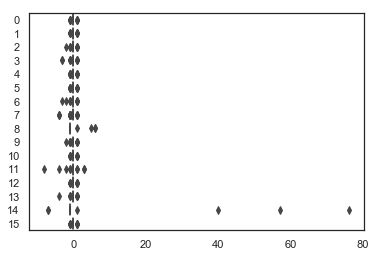

In [104]:
sns.boxplot(data= adata.X, orient="h")

In [78]:
list(x1)

['CD2',
 'TCR',
 'CD4',
 'CD3D',
 'CD7 ',
 'CD43',
 'ALK',
 'CD45',
 'CD10',
 'Ki67',
 'CD5',
 'CD11b',
 'FOXP3',
 'CD8',
 'CD57',
 'DAPI']

In [17]:
# Preprocessing
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=0)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [18]:
adata

AnnData object with n_obs × n_vars = 3006 × 16 
    obs: 'cells', 'n_genes', 'n_counts'
    var: 'n_cells'

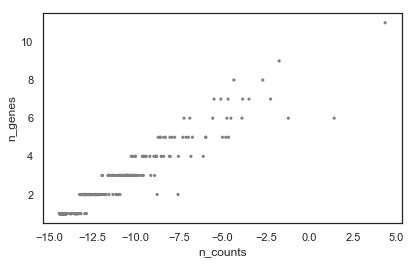

In [19]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [20]:
sc.tl.pca(adata, svd_solver='arpack')

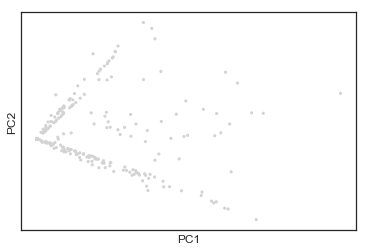

In [21]:
sc.pl.pca(adata)

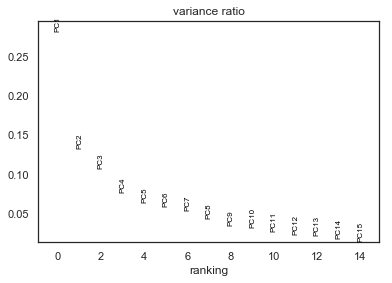

In [22]:
sc.pl.pca_variance_ratio(adata)

In [27]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=9)

In [28]:
sc.tl.umap(adata)

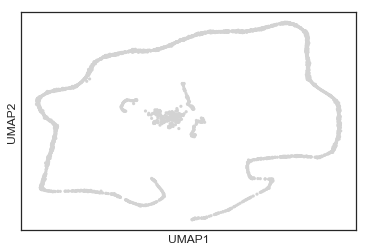

In [29]:
sc.pl.umap(adata)

TypeError: object of type 'numpy.int64' has no len()

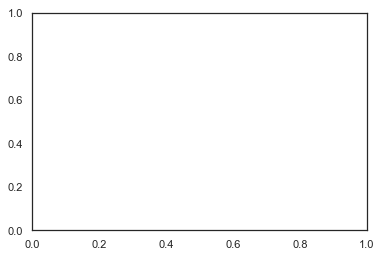

In [30]:
sc.pl.umap(adata, color=['DAPI'])